House Price Prediction
Algorithms Used:
1.XGBoost
2.Random Forest
XGBoost = Boosting Model
Random Forest = Bagging Model

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

In [2]:
data = fetch_california_housing()
X,y= data.data,data.target


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=47, test_size= 0.2)

In [3]:
# Enter your code here
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


Number of Observations: 20640
Number of Features: 8


In [4]:
df = pd.DataFrame(data.data, columns= data.feature_names)

df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
n_estimators = 100

rf = RandomForestRegressor(n_estimators = n_estimators ,random_state=42)
xgb = XGBRegressor(n_estimators = n_estimators, random_state =42)

In [6]:
start_time= time.time()
rf.fit(X_train,y_train)
rf_time= time.time()- start_time

print(f" random forest training time: {rf_time:.2f} seconds")


start_time = time.time()
xgb.fit(X_train,y_train)
xgb_time =time.time() - start_time
print(f"XGB training time :{xgb_time: .2f} seconds")

 random forest training time: 12.20 seconds
XGB training time : 0.14 seconds


In [7]:
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [8]:
rf_mse = mean_squared_error(y_test, rf_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"Random Forest MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")
print(f"XGBoost MSE: {xgb_mse:.4f}, R²: {xgb_r2:.4f}")

Random Forest MSE: 0.2487, R²: 0.8175
XGBoost MSE: 0.2197, R²: 0.8388


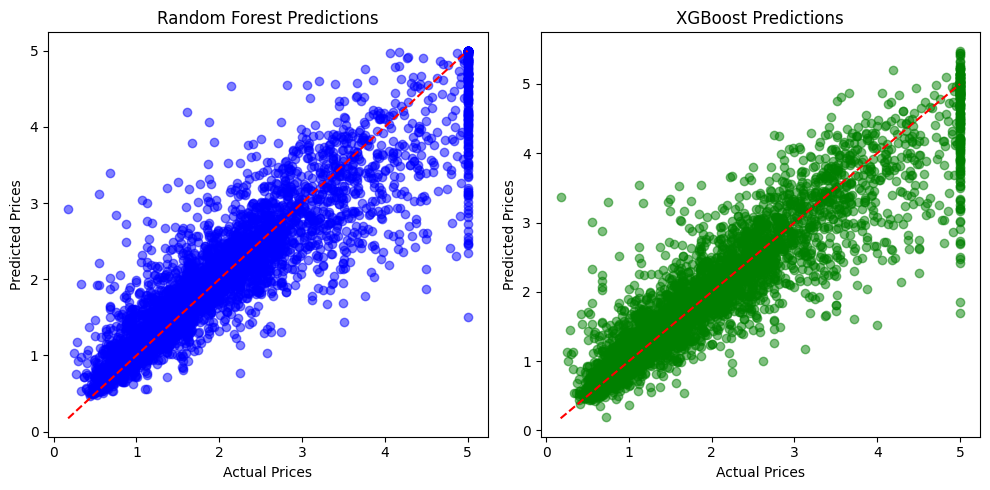

In [9]:
plt.figure(figsize=(10, 5))

# Plot Actual vs Predictions for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Predictions")

# Plot Actual vs Predictions for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Predictions")

plt.tight_layout()
plt.show()